I want to compare the redshift zero output of one to the redshift $z$ output of that same halo but at earlier times, to see if that's an accurate comparison.

In [10]:
%matplotlib inline
import numpy as np
from astropy import cosmology
import astropy.units as u
import numpy as np
import os
from scipy import integrate

import betterplotlib as bpl

bpl.presentation_style()

In [2]:
def a_to_z(a):
    return (1.0 / a) - 1.0

def z_to_a(z):
    return 1.0 / (1.0 + z)

def z_to_age(z):
    ages = [cosmology.Planck15.age(z_i).to("Myr") for z_i in z]
    return u.Quantity(ages)

In [5]:
class UniverseMachine(object):
    def __init__(self, file):
        self.read_sfh(file)
        
    def parse_file(self, file):
        home_dir = "/Users/gillenb/code/abundance_matching/abundance_matching/data/universe_machine/data/"
        return home_dir + file

    def read_sfh(self, file):
        with open(self.parse_file(file), "r") as in_file:
            a = []
            sfh_all, err_up_all, err_down_all = [], [], []
            sfh_cen, err_up_cen, err_down_cen = [], [], []
            sfh_sat, err_up_sat, err_down_sat = [], [], []

            for line in in_file:
                if line.startswith("#"):
                    continue
                split_line = line.split()

                a.append(float(split_line[0]))

                sfh_all.append(float(split_line[1]))
                err_up_all.append(float(split_line[2]))
                err_down_all.append(float(split_line[3]))

                sfh_cen.append(float(split_line[10]))
                err_up_cen.append(float(split_line[11]))
                err_down_cen.append(float(split_line[12]))

                sfh_sat.append(float(split_line[13]))
                err_up_sat.append(float(split_line[14]))
                err_down_sat.append(float(split_line[15]))

        self.sfh_a = np.array(a)
        self.sfh_z = a_to_z(self.sfh_a)
        self.ages = z_to_age(self.sfh_z)

        self.sfh_all = u.Quantity(sfh_all, "Msun/year")
        self.sfh_err_up_all = u.Quantity(err_up_all, "Msun/year")
        self.sfh_err_down_all = u.Quantity(err_down_all, "Msun/year")
        self.sfh_up_bound_all = self.sfh_all + self.sfh_err_up_all
        self.sfh_low_bound_all = self.sfh_all - self.sfh_err_down_all

        self.sfh_cen = u.Quantity(sfh_cen, "Msun/year")
        self.sfh_err_up_cen = u.Quantity(err_up_cen, "Msun/year")
        self.sfh_err_down_cen = u.Quantity(err_down_cen, "Msun/year")
        self.sfh_up_bound_cen = self.sfh_cen + self.sfh_err_up_cen
        self.sfh_low_bound_cen = self.sfh_cen - self.sfh_err_down_cen

        self.sfh_sat = u.Quantity(sfh_sat, "Msun/year")
        self.sfh_err_up_sat = u.Quantity(err_up_sat, "Msun/year")
        self.sfh_err_down_sat = u.Quantity(err_down_sat, "Msun/year")
        self.sfh_up_bound_sat = self.sfh_sat + self.sfh_err_up_sat
        self.sfh_low_bound_sat = self.sfh_sat - self.sfh_err_down_sat

In [6]:
m12_z0 = UniverseMachine("sfhs/sfh_hm12.00_a1.002310.dat")
m12_z1 = UniverseMachine("sfhs/sfh_hm12.00_a0.501122.dat")
m1175_z1 = UniverseMachine("sfhs/sfh_hm11.75_a0.501122.dat")

/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/mathtext.py:827: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)
/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


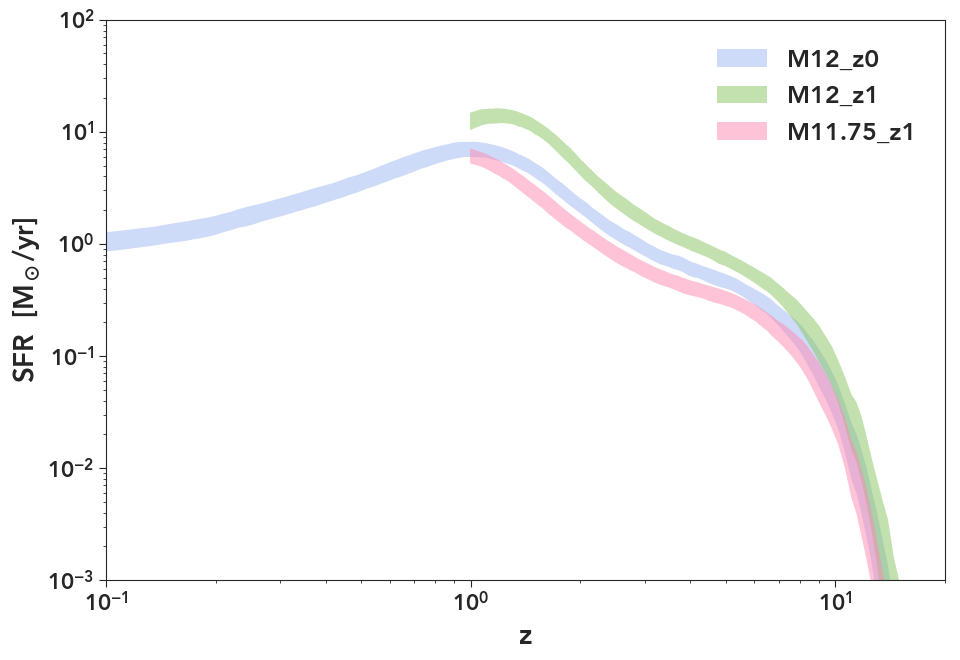

In [11]:
fig, ax = bpl.subplots()

ax.fill_between(m12_z0.sfh_z, 
                m12_z0.sfh_low_bound_all.to("Msun/yr").value, 
                m12_z0.sfh_up_bound_all.to("Msun/yr").value, 
                alpha=0.5, zorder=1, label="M12_z0")
ax.fill_between(m12_z1.sfh_z, 
                m12_z1.sfh_low_bound_cen.to("Msun/yr").value, 
                m12_z1.sfh_up_bound_cen.to("Msun/yr").value, 
                alpha=0.5, zorder=1, label="M12_z1")
ax.fill_between(m1175_z1.sfh_z, 
                m1175_z1.sfh_low_bound_cen.to("Msun/yr").value, 
                m1175_z1.sfh_up_bound_cen.to("Msun/yr").value, 
                alpha=0.5, zorder=1, label="M11.75_z1")

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_limits(0.1, 20, 0.001, 100)
ax.add_labels("z", "SFR  [$M_\odot$/yr]")

# ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# ax.set_xticks(ticks)
# ax.set_xticklabels([str(item) for item in ticks]);
# fig.savefig("sfh_comparison.png")

Try the same exercise with stellar mass

In [12]:
ms1050_z0 = UniverseMachine("sfhs/sfh_sm10.50_a1.002310.dat")
ms1050_z1 = UniverseMachine("sfhs/sfh_sm10.50_a0.501122.dat")
ms1010_z1 = UniverseMachine("sfhs/sfh_sm10.10_a0.501122.dat")

/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/mathtext.py:827: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)
/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


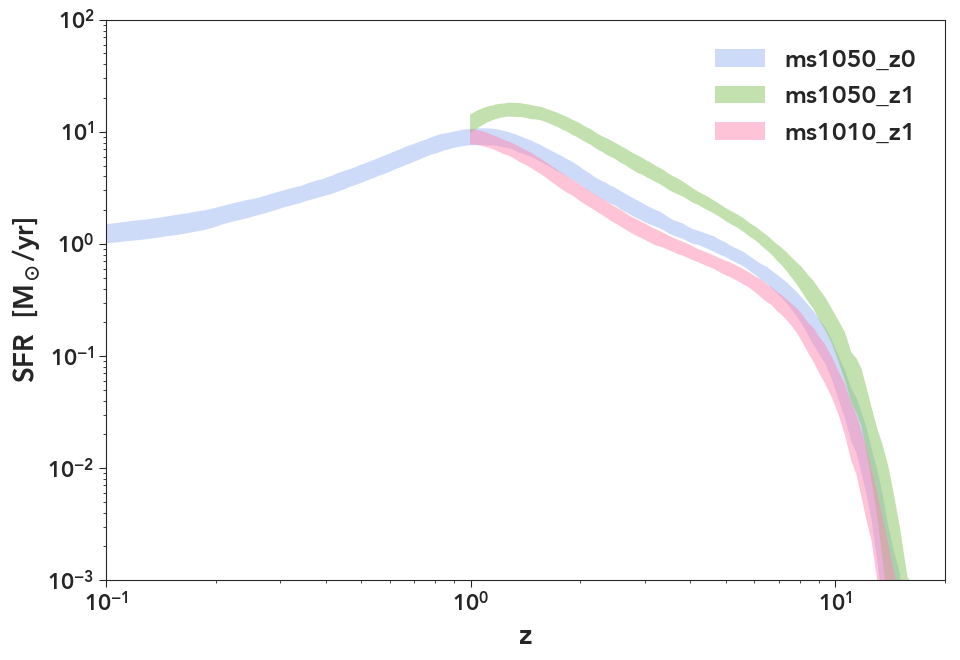

In [13]:
fig, ax = bpl.subplots()

ax.fill_between(ms1050_z0.sfh_z, 
                ms1050_z0.sfh_low_bound_all.to("Msun/yr").value, 
                ms1050_z0.sfh_up_bound_all.to("Msun/yr").value, 
                alpha=0.5, zorder=1, label="ms1050_z0")
ax.fill_between(ms1050_z1.sfh_z, 
                ms1050_z1.sfh_low_bound_cen.to("Msun/yr").value, 
                ms1050_z1.sfh_up_bound_cen.to("Msun/yr").value, 
                alpha=0.5, zorder=1, label="ms1050_z1")
ax.fill_between(ms1010_z1.sfh_z, 
                ms1010_z1.sfh_low_bound_cen.to("Msun/yr").value, 
                ms1010_z1.sfh_up_bound_cen.to("Msun/yr").value, 
                alpha=0.5, zorder=1, label="ms1010_z1")

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_limits(0.1, 20, 0.001, 100)
ax.add_labels("z", "SFR  [$M_\odot$/yr]")

# ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# ax.set_xticks(ticks)
# ax.set_xticklabels([str(item) for item in ticks]);
# fig.savefig("sfh_comparison.png")

# So in conclusion, the masses in the files are the masses at that scale factor